# Predict survival on the Titanic
In this Lab, we will apply the tools of machine learning to predict which passengers survived the tragedy

### Dataset
The dataset contains 891 observations of 12 variables:
* **PassengerId**: Unique ID for each passenger
* **Survived**: Survival (0 = No; 1 = Yes)
* **Pclass**: Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
* **Name**: Name
* **Sex**: Sex
* **Age**: Age
* **Sibsp**: Number of Siblings/Spouses Aboard
* **Parch**: Number of Parents/Children Aboard
* **Ticket**: Ticket Number
* **Fare**: Passenger Fare
* **Cabin**: Cabin
* **Embarked** Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

In [ ]:
# imports
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np

In [ ]:
import pandas as pd
import numpy as np
titanic = pd.read_csv('titanic.csv')
titanic.drop('Cabin', axis=1, inplace=True) # We Drop this column because it contains a lot of Nan values
titanic["Age"].fillna(titanic["Age"].median(),inplace=True)
titanic["Embarked"].fillna("S", inplace = True)
print ('survival rate =', titanic.Survived.mean())

survival rate = 0.3838383838383838


## Model training

In [ ]:
# Some of the columns don't have predictive power, so let's specify which ones are included for prediction
predictors = ["Pclass", "Sex", "Age", 'SibSp' ,'Parch', "Fare", "Embarked"]  
# We need now to convert text columns in predictors to numerical ones
for col in predictors: # Loop through all columns in predictors
    if titanic[col].dtype == 'object':  # check if column's type is object (text)
        titanic[col] = pd.Categorical(titanic[col]).codes  # convert text to numerical

titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,2


In [ ]:
# Split the data into a training set and a testing set
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(titanic[predictors], titanic['Survived'], test_size=0.3, random_state=1)

from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=1)
clf.fit(X_train, y_train)
train_score = clf.score(X_train, y_train)
print ('train accuracy =', clf.score(X_train, y_train))
print ('test accuracy =', clf.score(X_test, y_test))

from sklearn.model_selection import cross_val_score 
scores = cross_val_score(clf, titanic[predictors], titanic["Survived"], scoring='accuracy', cv=5)
print('cross validation accuracy =', scores.mean())

train accuracy = 0.8073836276083467
test accuracy = 0.7723880597014925
cross validation accuracy = 0.7890025735986442


 # Decision Trees

Let's start with one single tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf_dt = DecisionTreeClassifier(random_state=1)
clf_dt.fit(X_train, y_train)
train_score = clf_dt.score(X_train, y_train)
test_score = clf_dt.score(X_test, y_test)
print ('train accuracy =', train_score)
print ('test accuracy =', test_score)

train accuracy = 0.9887640449438202
test accuracy = 0.7574626865671642


Predictions are obtained in the same way of Logistic Regression

In [ ]:
y_pred = clf_dt.predict(X_test)
print (y_pred)

[1 0 1 1 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 1 0 1 0 0 1 0 0 0 1
 0 1 0 0 0 1 0 1 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0
 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 1
 1 0 0 0 0 0 0 1 0 1 1 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 0 1 1 0 1 0 0 0 1 0
 0 0 1 0 0 0 0 1 0 0 1 0 0 0 1 1 0 0 1 0 1 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1
 0 0 1 0 1 0 1 1 1 0 1 0 1 0 0 0 1 0 1 0 0 1 0 0 0 1 0 0 1 0 0 0 1 1 0 0 0
 1 1 0 0 1 1 1 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 0 1 0 0 1 1 1 1 1 1 0
 0 1 0 1 0 0 0 0 1]


In [ ]:
y_prob = clf_dt.predict_proba(X_test)
print (y_prob)

[[ 0.    1.  ]
 [ 1.    0.  ]
 [ 0.    1.  ]
 [ 0.    1.  ]
 [ 0.    1.  ]
 [ 1.    0.  ]
 [ 1.    0.  ]
 [ 0.    1.  ]
 [ 1.    0.  ]
 [ 0.    1.  ]
 [ 1.    0.  ]
 [ 1.    0.  ]
 [ 1.    0.  ]
 [ 1.    0.  ]
 [ 0.25  0.75]
 [ 1.    0.  ]
 [ 1.    0.  ]
 [ 1.    0.  ]
 [ 1.    0.  ]
 [ 1.    0.  ]
 [ 0.5   0.5 ]
 [ 1.    0.  ]
 [ 0.    1.  ]
 [ 1.    0.  ]
 [ 1.    0.  ]
 [ 1.    0.  ]
 [ 0.    1.  ]
 [ 0.    1.  ]
 [ 1.    0.  ]
 [ 0.    1.  ]
 [ 1.    0.  ]
 [ 1.    0.  ]
 [ 0.    1.  ]
 [ 1.    0.  ]
 [ 1.    0.  ]
 [ 1.    0.  ]
 [ 0.    1.  ]
 [ 1.    0.  ]
 [ 0.    1.  ]
 [ 1.    0.  ]
 [ 1.    0.  ]
 [ 1.    0.  ]
 [ 0.    1.  ]
 [ 1.    0.  ]
 [ 0.    1.  ]
 [ 1.    0.  ]
 [ 1.    0.  ]
 [ 1.    0.  ]
 [ 0.    1.  ]
 [ 0.    1.  ]
 [ 0.    1.  ]
 [ 0.    1.  ]
 [ 0.    1.  ]
 [ 1.    0.  ]
 [ 1.    0.  ]
 [ 1.    0.  ]
 [ 1.    0.  ]
 [ 1.    0.  ]
 [ 1.    0.  ]
 [ 1.    0.  ]
 [ 1.    0.  ]
 [ 0.8   0.2 ]
 [ 1.    0.  ]
 [ 1.    0.  ]
 [ 0.    1.  ]
 [ 1.    0.  ]
 [ 1.    0

Let's play around with some of the decision tree's parameters

In [ ]:
clf_dt = DecisionTreeClassifier(random_state=1, max_depth=3)
clf_dt.fit(X_train, y_train)
print ('train accuracy =', clf_dt.score(X_train, y_train))

# Cross validation
scores_dt = cross_val_score(clf_dt, titanic[predictors], titanic["Survived"], scoring='accuracy', cv=5)
print('cross validation accuracy =',scores_dt.mean())

train accuracy = 0.8571428571428571
cross validation accuracy = 0.8091959073504487


We Predict the probability of a female, Pclass 1 or 2, above age 2.5

In [ ]:
passenger1=np.array([1, 0, 3, 0, 0, 0, 0]).reshape(1, -1)
print ('proba =', clf_dt.predict_proba(passenger1))
print ('class =', clf_dt.predict(passenger1))

proba = [[ 0.04347826  0.95652174]]
class = [1]


Let's see which are the most important features using the attribute: **feature\_importances_**

In [ ]:
feat_imp = pd.DataFrame(clf_dt.feature_importances_, predictors, columns=['Importance'])
feat_imp.sort_values('Importance', ascending=False)

,Importance
Sex,0.611786
Pclass,0.189001
Age,0.084796
SibSp,0.064193
Embarked,0.050225
Parch,0.000000
Fare,0.000000


As expected, **Parch** and **Fare** are the least important ones because they were not used for splitting, while **Sex** is the most important one since it was used first for splitting. 

# Random Forest
A   [Random Forest](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier from sklearn.ensemble import RandomForestClassifier) is an ensemble of [decision trees](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf_rf = RandomForestClassifier(random_state=1)  # by default, 10 trees are used
clf_rf.fit(X_train, y_train)
print ('train accuracy =', clf_rf.score(X_train, y_train))

# Cross validation
scores_rf = cross_validation.cross_val_score(clf_rf, titanic[predictors], titanic["Survived"], scoring='accuracy', cv=5)
print('cross validation accuracy =',scores_rf.mean())

train accuracy = 0.974317817014
cross validation accuracy = 0.813763415464


In the same way, you can print the feature importance of all the trees

In [ ]:
feat_imp = pd.DataFrame(clf_rf.feature_importances_, predictors, columns=['Importance'])
feat_imp.sort_values('Importance', ascending=False)

,Importance
Age,0.266266
Fare,0.257963
Sex,0.239376
Pclass,0.087316
SibSp,0.061535
Parch,0.054428
Embarked,0.033116


Random forest, like decision trees have a lot of parameters to tune. Usually, performance does not change linearly with parameters. Let's take as an example, the accuracy as a function of number of trees (**n_estimators**)

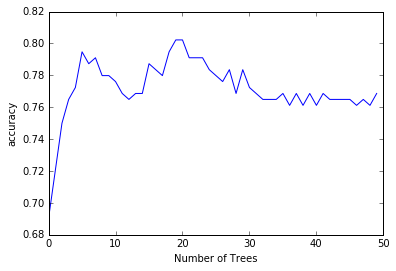

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

trees = range(50)
accuracy = np.zeros(50)
for idx in range(len(trees)):
    clf_rf=RandomForestClassifier(random_state=1, n_estimators=idx + 1)
    clf_rf.fit(X_train,y_train)
    accuracy[idx]=clf_rf.score(X_test, y_test)  

plt.plot(trees, accuracy)
plt.ylabel('accuracy')
plt.xlabel('Number of Trees')

In the following, we try to tune manually the following parameters: **min_samples_leaf, min_samples_split, max_depth, n_estimators** in order to increase cross validation accuracy.

In [ ]:
clf_rf = RandomForestClassifier(random_state=1, min_samples_leaf=1, min_samples_split=2, max_depth=3, n_estimators=15)
clf_rf.fit(X_train, y_train)
print ('train accuracy =', clf_rf.score(X_train, y_train))

# Cross validation
scores_rf = cross_validation.cross_val_score(clf_rf, titanic[predictors], titanic["Survived"], scoring='accuracy', cv=5)
print('cross validation accuracy =', scores_rf.mean())

train accuracy = 0.841091492777
cross validation accuracy = 0.786935502575


This might be a difficult job to do manually. In other way is to search automatically the best combination of different ranges for these parameters. This is done using **Grid Search**

# Grid Search

In [ ]:
from sklearn.grid_search import GridSearchCV
params = {'min_samples_leaf':list(range(1,5)),'min_samples_split':list(range(2,10,2)),
          'n_estimators':list(range(10,50,10))}
clf_rf2=RandomForestClassifier(random_state=1)
clf_gs=GridSearchCV(clf_rf2, params, scoring ='accuracy', cv=5)
clf_gs.fit(titanic[predictors], titanic["Survived"])

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=1, verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'min_samples_split': [2, 4, 6, 8], 'n_estimators': [10, 20, 30, 40], 'min_samples_leaf': [1, 2, 3, 4]},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

Print the best score

In [ ]:
clf_gs.best_score_

0.83277216610549942

Print the best parameters

In [ ]:
clf_gs.best_params_

{'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 30}

Let's use these best parameters and check whether they achieve really the above cv accuracy

In [ ]:
clf_rf3 = RandomForestClassifier(random_state=1, min_samples_leaf= 4, min_samples_split= 2, n_estimators= 30) 
clf_rf3.fit(X_train, y_train)
print ('train accuracy =', clf_rf3.score(X_train, y_train))

scores_rf3 = cross_validation.cross_val_score(clf_rf3, titanic[predictors], titanic["Survived"], scoring='accuracy', cv=5)
print('cross validation accuracy =',scores_rf3.mean())

train accuracy = 0.886035313002
cross validation accuracy = 0.832820954207


As we can see, grid search allows us to find the best model parameters to improve our accuracy. Now, we can see the most important features of this last classifier

In [ ]:
feat_imp = pd.DataFrame(clf_rf3.feature_importances_, predictors, columns=['Importance'])
feat_imp.sort_values('Importance', ascending=False)

,Importance
Sex,0.387434
Fare,0.204499
Age,0.147745
Pclass,0.130683
SibSp,0.053662
Parch,0.040667
Embarked,0.035311
